##Comentarios

En general, la aproximación inicial muestra una caracterización de los datos, y la metodología de validación está bien planteada. De hecho, el mejor modelo para este caso específico es un polinomio de segundo grado, sin incorporar técnicas de regularización.

Se podría haber profundizado más en el uso de la regularización para mejorar la precisión del modelo. Además, es crucial tener en cuenta la importancia de reservar un conjunto de datos para pruebas independientes


## puntaje 15/20

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, LeavePOut
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.utils import resample

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Punto 3

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/commaseparatedvalues/LondonCars2014.csv"

### 3.A Selección de la Marca

In [ ]:
df2 = pd.read_csv(path)
count = df2['Model'].value_counts()
print(count)

Altima S         197
C 300            175
3 Series 328i    141
RX 350           139
G 37             132
                ... 
S40 T5             1
Seville SLS        1
62 S               1
300 C SRT8         1
Spectra SX         1
Name: Model, Length: 1060, dtype: int64


Tomaremos el modelo G37 de infiniti

In [ ]:
df_filtered = df2[df2['Model'] == 'G 37']
df_filtered

,Make,Model,Year,Mileage,Price,Body Style,Ex Color,In Color,Engine,Transmission,Doors
59,Infiniti,G 37,2013,43376,20990,Sedan,Purple,Tan,6 Cyl,Automatic,4
241,Infiniti,G 37,2012,19026,30000,Sedan,White,Tan,6 Cyl,Automatic,4
302,Infiniti,G 37,2011,24504,28977,Coupe,Blue,Gray,6 Cyl,Automatic,2
388,Infiniti,G 37,2011,33172,25977,Sedan,Blue,Gray,6 Cyl,Automatic,4
398,Infiniti,G 37,2011,35975,27495,Sedan,White,Gray,6 Cyl,Automatic,4
...,...,...,...,...,...,...,...,...,...,...,...
8979,Infiniti,G 37,2012,28557,28000,Sedan,Black,Gray,6 Cyl,Automatic,4
8989,Infiniti,G 37,2012,28557,28000,Sedan,Black,Gray,6 Cyl,Automatic,4
8999,Infiniti,G 37,2010,41638,22995,Coupe,Gray,Gray,6 Cyl,Automatic,2
9068,Infiniti,G 37,2012,28557,28000,Sedan,Black,Gray,6 Cyl,Automatic,4


Primero vamos a tomar solo las columnas kilometraje del vehículo y el año de fabricación, basados en la columna año de fabricación vamos a crear una nueva columna, llamada años de antiguedad del vehículo, esto ya que tomar los años como valores numéricos no es apropiado

In [ ]:
df_filter = df_filtered.drop(['Make', 'Model', 'Body Style', 'Ex Color', 'In Color', 'Engine', 'Transmission', 'Doors'], axis=1)
df_filter['vehicle_age'] = 2014 - df_filter['Year']
target = df_filter["Price"]
df_filter = df_filter.drop(['Year'], axis=1)


Grafiquemos los valores contra la variable objetivo price contra
el kilometraje del vehículo y el año de fabricación que es lo que se nos indica en el documento

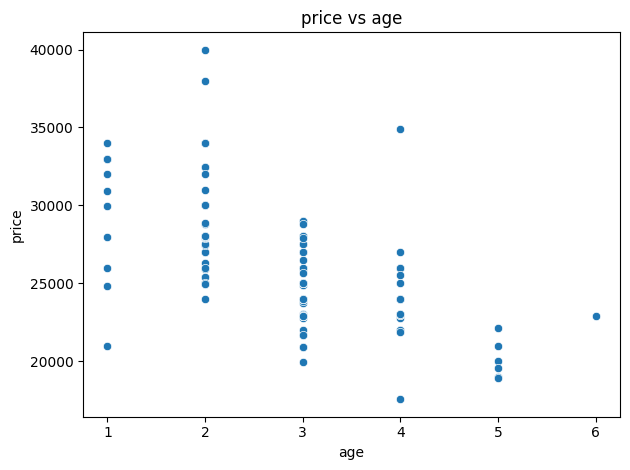

In [ ]:
X = df_filter

targetString = "target"
sns.scatterplot(x=X['vehicle_age'], y=target)
plt.title('price'+" vs age")
plt.xlabel("age")
plt.ylabel("price")
plt.tight_layout()
plt.show()

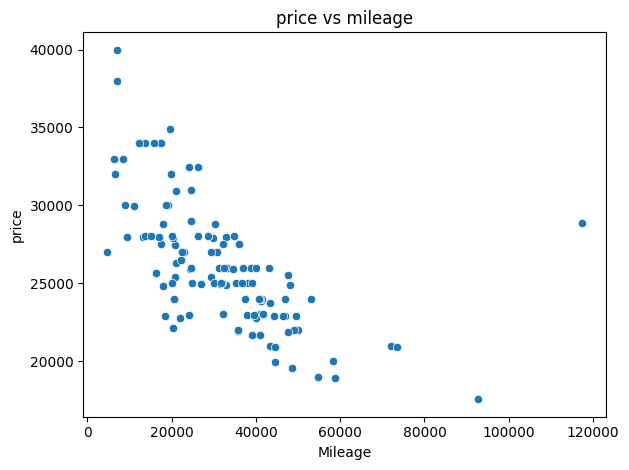

In [ ]:
sns.scatterplot(x=X['Mileage'], y=target)
plt.title('price'+" vs mileage")
plt.xlabel("Mileage")
plt.ylabel("price")


plt.tight_layout()
plt.show()

Parece que hay una relación lineal entre price y mileag. En la gráfica price vs mileage podemos ver que hay un dato que se sale bastante del patron, del resto, quitemoslo porque puede entorpecer nuestro trabajo

In [ ]:
X = X[X['Mileage'] < 110000]

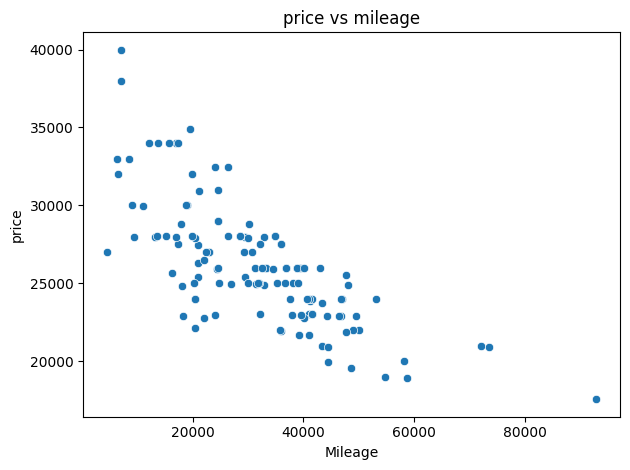

In [ ]:
sns.scatterplot(x=X['Mileage'], y=target)
plt.title('price'+" vs mileage")
plt.xlabel("Mileage")
plt.ylabel("price")
plt.tight_layout()
plt.show()

### 3.B Selección de Modelo

Dado que no estamos muy seguros de la linealidad de la relación, aplicaremos cross validation para encontrar el mejor grado del polinomio

In [ ]:
Y = X['Price']
X = X.drop(['Price'], axis=1)

A continuación vamos a hacer Cross validation

In [ ]:
orders = range(1,10)
modelosScores= []
#MSE Y MAE
for order in orders:
  poly = PolynomialFeatures(degree=int(order), include_bias=False)
  poly_features = poly.fit_transform(X)
  poly_reg_model = LinearRegression()


  mse_scores = -cross_val_score(poly_reg_model, poly_features, Y, cv=10, scoring='neg_mean_squared_error')
  average_mse = np.mean(mse_scores)


  modelosScores.append(["order: ", order, "avg_mse: ", average_mse])


In [ ]:
print(modelosScores)

[['order: ', 1, 'avg_mse: ', 6133534.165413556], ['order: ', 2, 'avg_mse: ', 5868584.757426195], ['order: ', 3, 'avg_mse: ', 6561710.075331213], ['order: ', 4, 'avg_mse: ', 10040941.906459173], ['order: ', 5, 'avg_mse: ', 14250160.623701295], ['order: ', 6, 'avg_mse: ', 49650777.94668226], ['order: ', 7, 'avg_mse: ', 321027829.16348207], ['order: ', 8, 'avg_mse: ', 4696973417.851698], ['order: ', 9, 'avg_mse: ', 25462389716.15595]]


Para estar seguros de que el polinomio de mejor grado para nuestros datos es 2, realizaremos Bootstrap

In [ ]:
n_bootstrap = 300
orders = range(1,10)
modelosScores= []
#MSE
for order in orders:
    poly = PolynomialFeatures(degree=int(order), include_bias=False)
    poly_features = poly.fit_transform(X)
    poly_reg_model = LinearRegression()

    mse_scores = []

    for _ in range(n_bootstrap):
        X_bootstrap, Y_bootstrap = resample(poly_features, Y, replace=True)
        poly_reg_model.fit(X_bootstrap, Y_bootstrap)
        y_pred = poly_reg_model.predict(poly_features)
        mse = mean_squared_error(Y, y_pred)
        mse_scores.append(mse)

    average_mse = np.mean(mse_scores)

    modelosScores.append(["order: ", order, "avg_mse: ", average_mse])

In [ ]:
print(modelosScores)

[['order: ', 1, 'avg_mse: ', 5871266.26176033], ['order: ', 2, 'avg_mse: ', 5460611.500673947], ['order: ', 3, 'avg_mse: ', 8157887.368247147], ['order: ', 4, 'avg_mse: ', 24838059.387308896], ['order: ', 5, 'avg_mse: ', 88169199.59026358], ['order: ', 6, 'avg_mse: ', 485291872.41084236], ['order: ', 7, 'avg_mse: ', 5539741264.896919], ['order: ', 8, 'avg_mse: ', 8733725855.937508], ['order: ', 9, 'avg_mse: ', 93182902447.6609]]


Efectivamente, el polinomio que tuvo un menor error fue el de grado 2

### 3.C Validación del Modelo

Al realizar Bootstrap y validación cruzada encontramos que el mejor grado para el modelo es de 2, a continuación entrenaremos el modelo con todos los datos.

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, Y)
print(poly_reg_model.coef_)

#Aqui se muestran los coeficientes de nuestro modelo

[-3.45280547e-01  4.88020331e+01  7.75742841e-07  3.81809905e-02
 -3.79482161e+02]
